# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]

    # Step 2: Perform eigendecomposition (this gives us the singular values and vectors)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 3: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 4: Select the top `n_components` eigenvectors and take the real part to avoid complex values
    V_n = np.real(sorted_eigenvectors[:, :n_components])

    # Step 5: Project the training and test data onto the new basis
    X_train_reduced = np.dot(X_train, V_n)
    X_test_reduced = np.dot(X_test, V_n)

    return X_train_reduced, X_test_reduced, sorted_eigenvectors


Part 3: Train Logistic Regression and Measure Performance

In [3]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
# Define a range of SVD components to test
svd_components = [100, 50, 10]
# Store the results (components, accuracy, training time)
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Processing {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    print(f"Completed SVD for {n_components} components")

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the result
    results.append((n_components, accuracy, training_time))

    # Display the results for each component
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Processing 100 components...
Completed SVD for 100 components
SVD components: 100, Accuracy: 0.9181, Training time: 55.8506 seconds
Processing 50 components...
Completed SVD for 50 components
SVD components: 50, Accuracy: 0.9085, Training time: 15.1047 seconds
Processing 10 components...
Completed SVD for 10 components
SVD components: 10, Accuracy: 0.8020, Training time: 1.0277 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


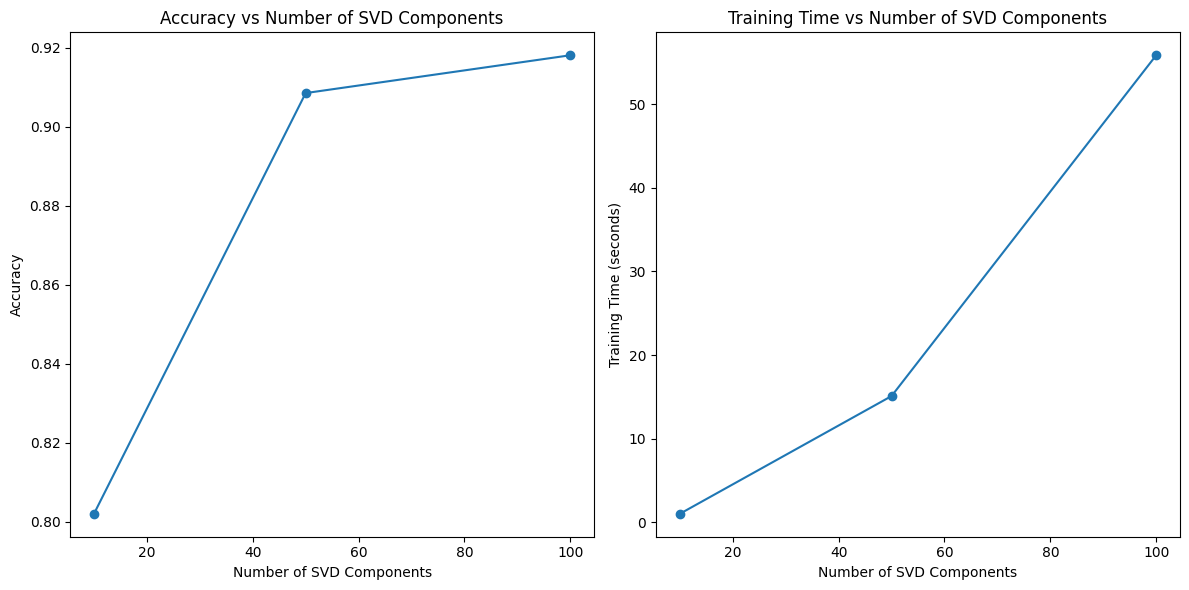

In [5]:
# Part 5: Plot the results
components, accuracies, times = zip(*results)

plt.figure(figsize=(12, 6))

# Plot accuracy vs number of SVD components
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

# Plot training time vs number of SVD components
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER: The logistic regression model's accuracy improves significantly with more SVD components, reaching optimal performance at 100 components. However, training time also increases linearly with the number of components, indicating a trade-off between accuracy and computational efficiency. This analysis highlights the importance of balancing feature extraction against performance constraints in machine learning applications.

